In [53]:
import re
import requests 
import numpy as np
import pandas as pd 
import seaborn as sns
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
sns.set_theme()

# 1. Document collection

In [2]:
url = 'https://www.squ.edu.om/'

In [3]:
# send request to the given url, and parse the html content
def getDocument(url):
    response = requests.get(url)
    soup = BeautifulSoup(response.content, 'html.parser')
    return soup

In [4]:
soup = getDocument(url)

In [5]:
aTags = soup.find_all('a')
# get all the links form the a tags
rowLinks = [x.get('href') for x in aTags]
# take only the valid links 
links = [x for x in rowLinks if x and 'http' in x and url.split('/')[2] in x]

In [6]:
pages = []
for link in links:
    # get url content
    page = getDocument(link)
    # replace any decimal, non-word character or non-ASCII with space and covert text to lower case
    text = re.sub(r'[^\x00-\x7F]|[\W+\s+\d+]', ' ', page.get_text()).lower()
    pages.append(text)

# 2. Pre-processing

In [7]:
# download nltk stop words 
import nltk
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [8]:
# tokenize the documents 
from nltk.tokenize import word_tokenize
pages = [word_tokenize(doc) for doc in pages]

In [9]:
# remove stop words 
from nltk.corpus import stopwords
for i in range(len(pages)):
    # ignore stop words and single letters
    pages[i] = [word for word in pages[i] if word not in stopwords.words('english') and len(word) > 1]

In [10]:
# apply stemming to the words 
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()
for i in range(len(pages)):
    pages[i] = [stemmer.stem(word) for word in pages[i]]

# 3. Feature extraction

In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
vectors = vectorizer.fit_transform([" ".join(page) for page in pages])
# convert to dataframe
df = pd.DataFrame(vectors.toarray(), columns = vectorizer.get_feature_names_out())

In [13]:
df

,aajabri,abd,abdalla,abdul,abdulla,abdullah,abil,abl,aboutabout,abouth,...,zahran,zaidi,zainab,zealandnicaraguanigernigerianiuenorfolk,zeheimi,zone,zonesoman,zoom,zubair,zuhd
0,0.0,0.0,0.037987,0.0,0.0,0.0,0.000000,0.0,0.0,0.014152,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0
1,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.016273,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0
2,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.021441,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0
3,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.015715,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0
4,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.026240,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143,0.0,0.0,0.000000,0.0,0.0,0.0,0.012587,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.015580,0.015580,0.0,0.0,0.0
144,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.039751,0.039751,0.0,0.0,0.0
145,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.026129,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0
146,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.025601,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0


# 4. Data Transformation

In [28]:
from sklearn.random_projection import GaussianRandomProjection
# set the value of p = 500 
projection = GaussianRandomProjection(n_components = 500)
transformed_matrix = projection.fit_transform(vectors)

In [30]:
transformed_matrix

array([[-0.0241489 ,  0.03826351, -0.00036782, ...,  0.01144729,
         0.01916967,  0.03144099],
       [ 0.0571906 ,  0.05680488,  0.00917138, ..., -0.02767918,
        -0.02763137, -0.02041396],
       [ 0.00499183,  0.02557002, -0.00578669, ...,  0.04885923,
        -0.00481917,  0.02723712],
       ...,
       [-0.00573868,  0.00699199,  0.02825562, ...,  0.03160537,
        -0.01323272,  0.0482608 ],
       [ 0.01021162, -0.01282382,  0.01073761, ...,  0.03150208,
        -0.02311631,  0.04754593],
       [ 0.0102267 ,  0.03510393,  0.01976965, ...,  0.08073608,
         0.04430724,  0.0031154 ]])

# 5. Data Clustering

In [32]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
kScores = {}

for k in range(2, 51):
    # clustering
    kmeans = KMeans(n_clusters = k)
    kmeans.fit(transformed_matrix)
    labels = kmeans.predict(transformed_matrix)
    # evaluation
    silhouette = silhouette_score(transformed_matrix, labels)
    # add scores
    kScores[k] = silhouette

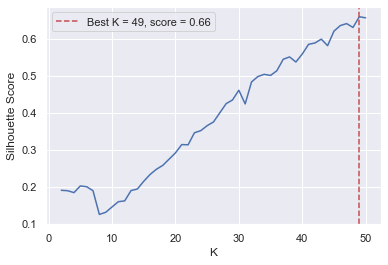

In [63]:
bestK = max(kScores, key=kScores.get)
sns.lineplot(x = list(kScores.keys()), y = list(kScores.values()))
plt.ylabel("Silhouette Score")
plt.xlabel("K")
plt.axvline(x = bestK, color = 'r', linestyle='--', label=f"Best K = {bestK}, score = {round(kScores[bestK],2)}")
plt.legend()

- Best K value is 49 with silouette score of 0.66

# 6. Cluster Visualization

In [64]:
# get the data for the best k 
k = KMeans(n_clusters = 49)
k.fit(transformed_matrix)

KMeans(n_clusters=49)

In [66]:
# get the centeroids
centeroids = k.cluster_centers_

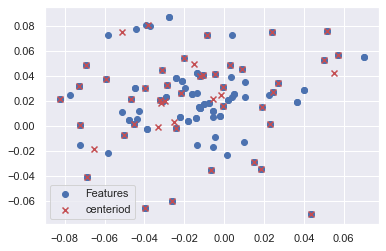

In [73]:
# plot the features
plt.scatter(transformed_matrix[:,0], transformed_matrix[:,1], label='Features')
# add the centeroids to the plots 
plt.scatter(centeroids[:,0], centeroids[:,1], marker='x', color='r', label = 'centeriod')
plt.legend()